<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [18]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

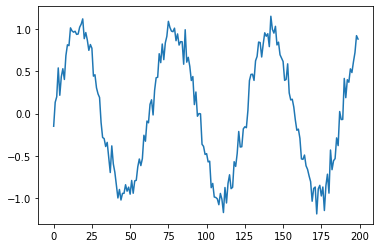

In [19]:
series= np.sin(0.1*np.arange(200 ))+ np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [20]:
T=10
X=[]
Y=[]
for t in range(0,len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(x)
print("X.shape :",X.shape,"Y.shape :",Y.shape)

X.shape : (190, 10) Y.shape : (190,)


In [21]:
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))
r=model.fit(X[:N//2],Y[:N//2],epochs=80,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 409ms/step - loss: 4.0905 - val_loss: 0.7384
Epoch 2/80
1/1 [==============================] - 0s 36ms/step - loss: 1.8658 - val_loss: 0.2247
Epoch 3/80
1/1 [==============================] - 0s 35ms/step - loss: 0.5406 - val_loss: 0.0195
Epoch 4/80
1/1 [==============================] - 0s 39ms/step - loss: 0.0474 - val_loss: 0.0500
Epoch 5/80
1/1 [==============================] - 0s 33ms/step - loss: 0.1835 - val_loss: 0.1904
Epoch 6/80
1/1 [==============================] - 0s 34ms/step - loss: 0.6021 - val_loss: 0.3130
Epoch 7/80
1/1 [==============================] - 0s 29ms/step - loss: 0.9542 - val_loss: 0.3521
Epoch 8/80
1/1 [==============================] - 0s 30ms/step - loss: 1.0636 - val_loss: 0.3085
Epoch 9/80
1/1 [==============================] - 0s 44ms/step - loss: 0.9366 - val_loss: 0.2166
Epoch 10/80
1/1 [==============================] - 0s 33ms/step - loss: 0.6704 - val_loss: 0.1170
Epoch 11/80
1/1 [======================

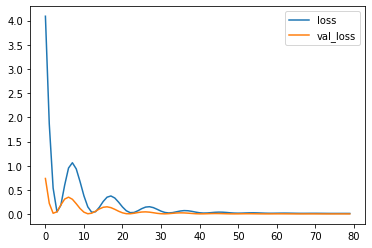

In [22]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [23]:
validation_target= Y[-N//2:]
validation_predictions=[]

i=-N//2

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(X[i].reshape(1,-1))[0,0]
  i+=1
  validation_predictions.append(p)

1/1 [==============================] - 0s 19ms/step


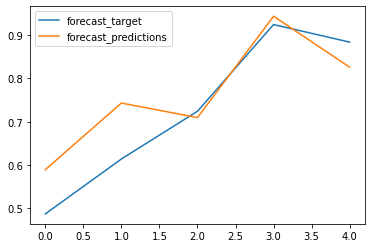

In [24]:
plt.plot(validation_target,label='forecast_target')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()

In [25]:
validation_target= Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

1/1 [==============================] - 0s 17ms/step


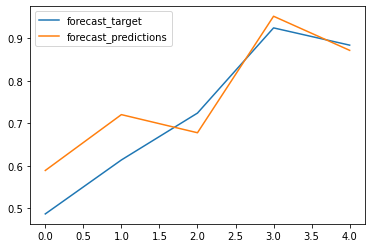

In [26]:
plt.plot(validation_target,label='forecast_target')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()